# Instalação do módulo Pydeck

In [2]:
#!pip install pydeck
#!pip install chart_studio

# Importação dos módulos utilizados

In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import chart_studio.plotly as py
#import plotly.tools as tl
#import plotly.graph_objs as go

# Carregamento da tabela fato e dimensões para o Pandas

In [2]:
fact_table = pd.read_csv('FATO_corrida.csv')
dim_circuito = pd.read_csv('DIM_circuito.csv')
dim_construtor = pd.read_csv('DIM_construtor.csv')
dim_piloto = pd.read_csv('DIM_piloto.csv')
dim_tempo = pd.read_csv('DIM_tempo.csv')


# Informações sobre os construtores


## Top 10 construtores como maior velocidade em todos os tempos

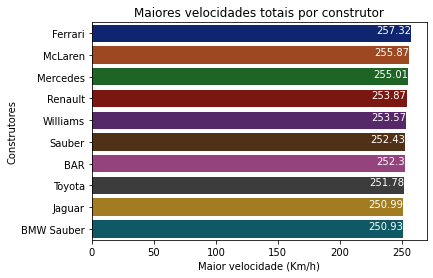

In [3]:
constructor_data = fact_table.merge(dim_construtor,on='id_construtor')
grouped_constructor = constructor_data.groupby('nome_construtor').agg({'maior_velocidade':np.max}).sort_values(by='maior_velocidade',ascending=False)
grouped_constructor = grouped_constructor[grouped_constructor.maior_velocidade != -1].reset_index().iloc[:10]
g = sns.barplot(y='nome_construtor',x='maior_velocidade',data=grouped_constructor,palette='dark')
g.set(xlabel='Maior velocidade (Km/h)',ylabel='Construtores')
g.set_title('Maiores velocidades totais por construtor')
for index, row in grouped_constructor.iterrows():
    g.text(row.maior_velocidade,row.name,round(row.maior_velocidade,2), color='white', ha="right")
sns.set(rc={'figure.figsize':(17,13)})
plt.show()

### Funções auxiliares para o display do dropdown

In [8]:
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, 'Todos')
    return unique

def dropdown_construtor_eventhandler(change):
    
    
    nome = change.new
    if change.new == 'Todos':
      data = grouped_time_constructor
    else:
      data = grouped_time_constructor[grouped_time_constructor.nome_construtor == change.new]
    ax = sns.lineplot(x=grouped_time_constructor.ano.astype('str'),y='maior_velocidade',data=data)
    sns.set(rc={'figure.figsize':(15,11)})
    plt.xticks(rotation=45)
    ax.set(xlabel='Maior velocidade (Km/h)',ylabel='Construtora')
    ax.set_title(f'Evolução de velocidade de {change.owner.value} pelo tempo')
    clear_output()
    display(dropdown_construtor)



## Evolução da velocidade máxima por construtor

Dropdown(index=1, options=('Todos', 'Alfa Romeo', 'AlphaTauri', 'Alpine F1 Team', 'Aston Martin', 'BAR', 'BMW …

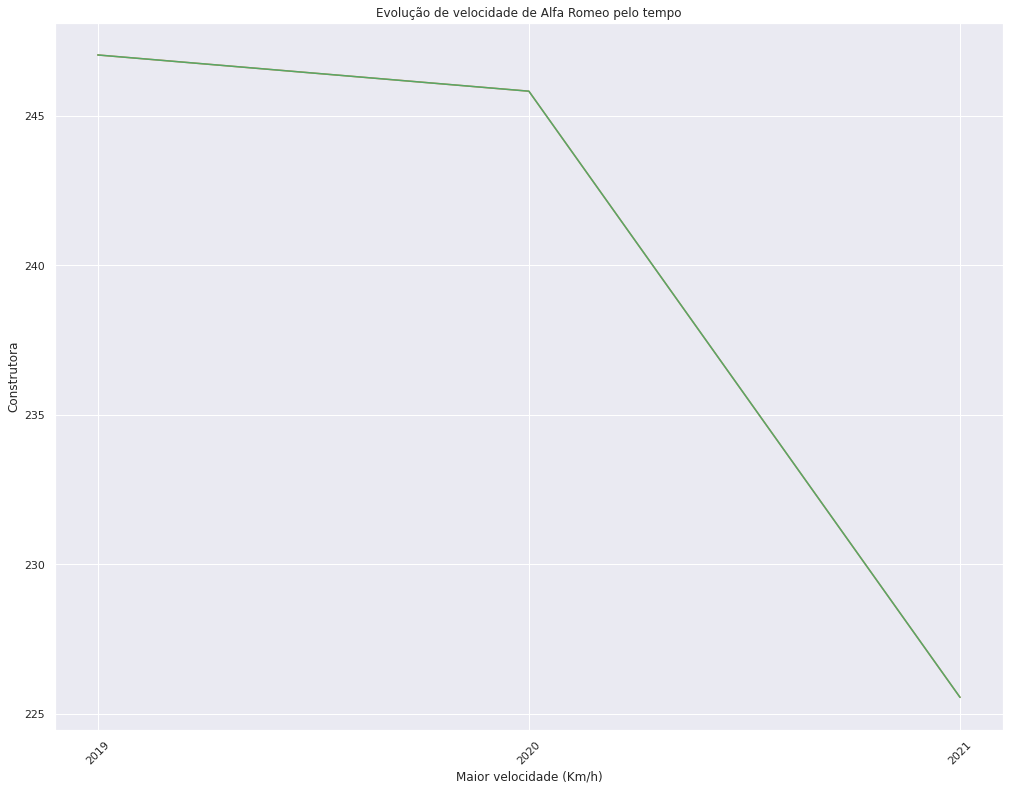

In [9]:
constructor_data_time = constructor_data.merge(dim_tempo,on='id_tempo')
grouped_time_constructor = constructor_data_time.groupby(['ano','nome_construtor']).agg({'maior_velocidade':np.max}).sort_values(by='maior_velocidade',ascending=False)
grouped_time_constructor = grouped_time_constructor[grouped_time_constructor.maior_velocidade != -1].reset_index().sort_values(by='ano')
dropdown_construtor = widgets.Dropdown(options =    unique_sorted_values_plus_ALL(grouped_time_constructor.nome_construtor))
display(dropdown_construtor)
dropdown_construtor.observe(dropdown_construtor_eventhandler)


## Maiores campeões do campeonato de construtores

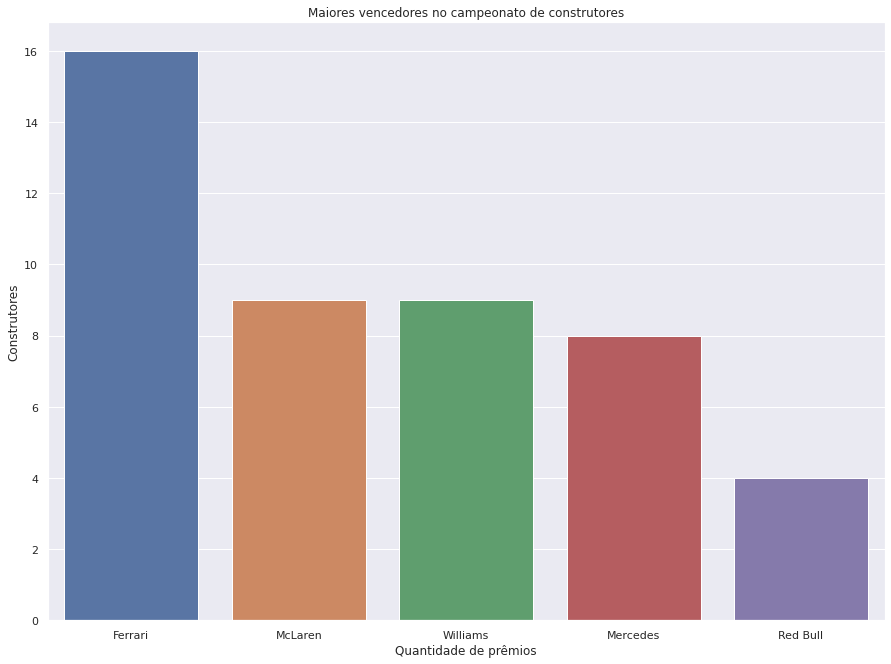

In [10]:
grouped_points = constructor_data_time.groupby(['ano','nome_construtor']).agg({'pontos':np.sum}).reset_index().sort_values(by=['ano','pontos'],ascending=[True,False])
winner_year = grouped_points.loc[grouped_points.groupby('ano')['pontos'].idxmax()]
winner_year = winner_year[winner_year.ano > 1958]
winner_times = winner_year.groupby('nome_construtor').agg({'ano':'count'}).rename(columns={'ano':'Quantidade_campeonatos'}).sort_values(by='Quantidade_campeonatos',ascending=False).reset_index().nlargest(5,'Quantidade_campeonatos')
g = sns.barplot(x='nome_construtor',y='Quantidade_campeonatos',data=winner_times)
g.set(xlabel='Quantidade de prêmios',ylabel='Construtores')
g.set_title('Maiores vencedores no campeonato de construtores')
sns.set(rc={'figure.figsize':(15,11)})
plt.show()

## Construtores com menor tempo de pit-stop 

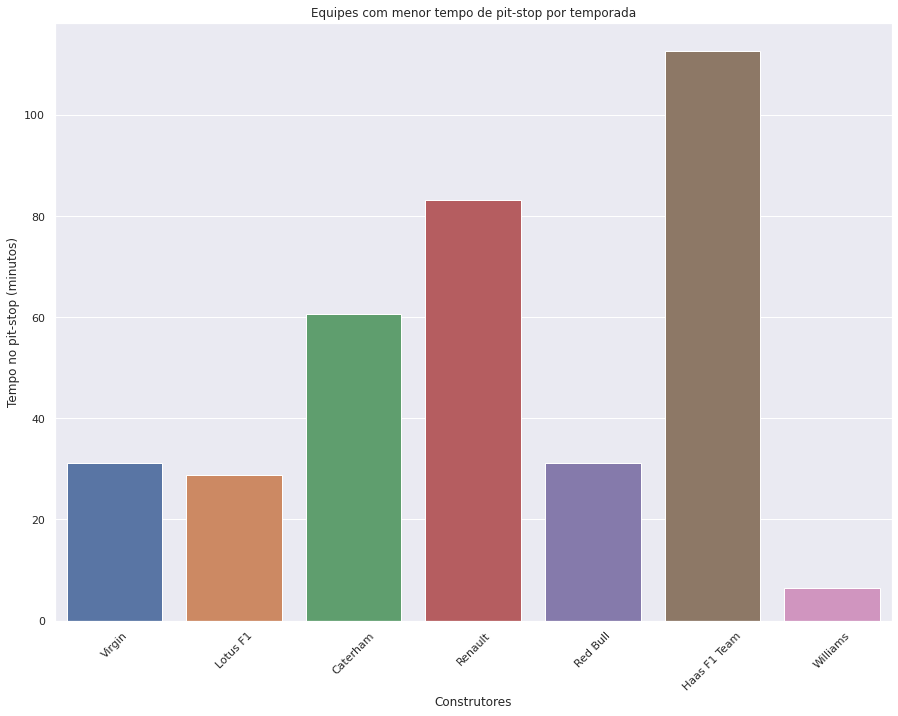

In [11]:
constructor_pits_info = constructor_data_time[constructor_data_time.soma_tempo_pits.notna()]
grouped_pits = constructor_pits_info.groupby(['ano','nome_construtor']).agg({'soma_tempo_pits':np.sum}).reset_index()
menor_tempo_pit = grouped_pits.loc[grouped_pits.groupby('ano')['soma_tempo_pits'].idxmin()]
# Transforma o tempo de milissegundos para minutos
menor_tempo_pit['soma_tempo_pits'] = menor_tempo_pit.soma_tempo_pits/60000
g = sns.barplot(x='nome_construtor',y='soma_tempo_pits',data=menor_tempo_pit,ci=None)
plt.xticks(rotation=45)
g.set(xlabel='Construtores',ylabel='Tempo no pit-stop (minutos)')
g.set_title('Equipes com menor tempo de pit-stop por temporada')
sns.set(rc={'figure.figsize':(15,11)})
plt.show()

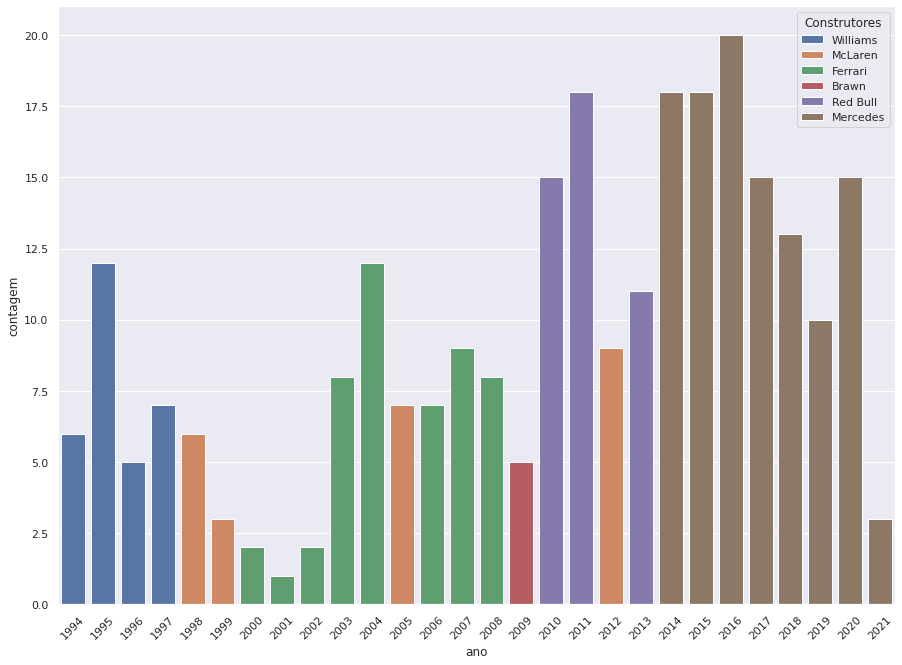

In [13]:
grouped_poles = constructor_data_time.groupby(['ano','nome_construtor'])['posicao_qualify'].value_counts()
df = pd.DataFrame(grouped_poles)
df.rename(columns={'posicao_qualify':'contagem'},inplace=True)
df.reset_index(inplace=True)
df = df[df.posicao_qualify == 1]
first_places = df.loc[df.groupby('ano')['contagem'].idxmax()]

g = sns.barplot(x='ano',y='contagem',data=first_places,hue='nome_construtor',dodge=False)
plt.legend(title='Construtores')
sns.set(rc={'figure.figsize':(15,11)})
plt.xticks(rotation=45)
plt.show()

# Informações sobre Corredores

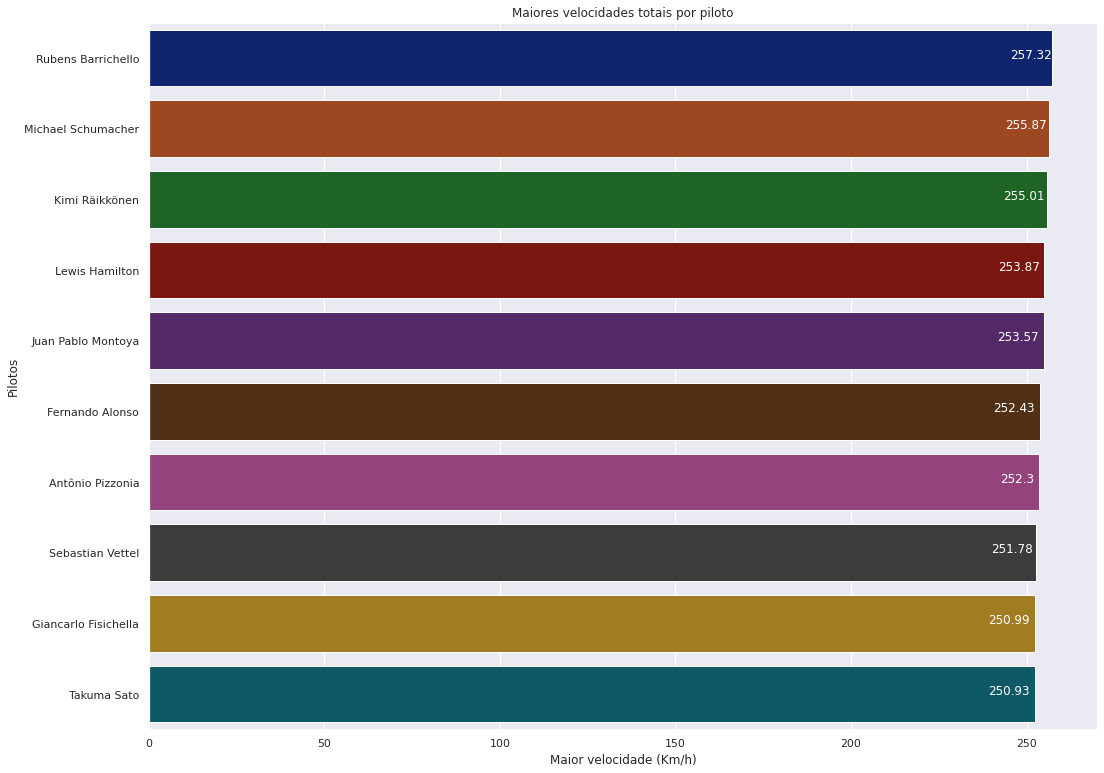

In [22]:
driver_data = fact_table.merge(dim_piloto,on='id_piloto')
grouped_driver = driver_data.groupby('nome_piloto').agg({'maior_velocidade':np.max}).sort_values(by='maior_velocidade',ascending=False)
grouped_driver = grouped_driver[grouped_driver.maior_velocidade != -1].reset_index().nlargest(10,'maior_velocidade')
g = sns.barplot(y='nome_piloto',x='maior_velocidade',data=grouped_driver,palette='dark')
g.set(xlabel='Maior velocidade (Km/h)',ylabel='Pilotos')
g.set_title('Maiores velocidades totais por piloto')
for index, row in grouped_constructor.iterrows():
    g.text(row.maior_velocidade,row.name,round(row.maior_velocidade,2), color='white', ha="right")
sns.set(rc={'figure.figsize':(17,13)})
plt.show()

In [27]:
driver_data_time = driver_data.merge(dim_tempo,on='id_tempo')
driver_data_time[(driver_data_time.nome_piloto == 'Rubens Barrichello')].sort_values(by='fastestLapSpeed',ascending=False)

,id_piloto,id_circuito,id_construtor,posicao_qualify,posicao_corrida,pontos,numer_voltas,fastestLapTime,fastestLapSpeed,milliseconds,quantidade_pits,soma_tempo_pits,status,id_tempo,volta_mais_rapida,maior_velocidade,tempo_corrida,data_nasc_piloto,nacionalidade_piloto,nome_piloto,dia,mes,ano,dia_semana,turno
6741,22,14,6,1.0,1,10.0,53,1:21.046,257.320,4518448,NaN,NaN,Finished,86,01:21:02,257.320,4518448,1972-05-23,Brazilian,Rubens Barrichello,12,9,2004,6,Noite
8228,22,14,6,8.0,12,0.0,52,1:23.466,249.859,-1,NaN,NaN,+1 Lap,67,01:23:27,249.859,-1,1972-05-23,Brazilian,Rubens Barrichello,4,9,2005,6,Tarde
6099,22,14,11,8.0,6,3.0,53,1:23.794,248.881,4534384,NaN,NaN,Finished,49,01:23:47,248.881,4534384,1972-05-23,Brazilian,Rubens Barrichello,10,9,2006,6,Tarde
649,22,14,11,12.0,10,0.0,53,1:24.767,246.024,4784764,NaN,NaN,Finished,30,01:24:46,246.024,4784764,1972-05-23,Brazilian,Rubens Barrichello,9,9,2007,6,Manhã
997,22,14,23,5.0,1,10.0,53,1:24.967,245.445,4581706,NaN,NaN,Finished,331,01:24:58,245.445,4581706,1972-05-23,Brazilian,Rubens Barrichello,13,9,2009,6,Manhã
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,22,11,6,NaN,4,3.0,77,-1,-1.000,6378026,NaN,NaN,Finished,151,23:59:59.999999,-1.000,6378026,1972-05-23,Brazilian,Rubens Barrichello,13,8,2000,6,Noite
8114,22,13,6,NaN,18,0.0,32,-1,-1.000,-1,NaN,NaN,Fuel pressure,152,23:59:59.999999,-1.000,-1,1972-05-23,Brazilian,Rubens Barrichello,27,8,2000,6,Noite
8136,22,14,6,NaN,17,0.0,0,-1,-1.000,-1,NaN,NaN,Collision,153,23:59:59.999999,-1.000,-1,1972-05-23,Brazilian,Rubens Barrichello,10,9,2000,6,Noite
8158,22,19,6,NaN,2,6.0,73,-1,-1.000,5803001,NaN,NaN,Finished,154,23:59:59.999999,-1.000,5803001,1972-05-23,Brazilian,Rubens Barrichello,24,9,2000,6,Noite


# Visualização da posição dos autódromos no mundo

In [ ]:

    
    
geo_data = dim_circuito[['latitude','longitude','nome_circuito']]
geo_data = geo_data.drop_duplicates()
mapbox_access_token = 'pk.eyJ1Ijoid2VzbGxleWNzdHMiLCJhIjoiY2twendkMWxkMHcwMTJucHBmb2kwc3hjaSJ9.191yTxoHIqEF2Yje7I1pYA'
data = go.Scattermapbox(
        lat=geo_data.latitude,
        lon=geo_data.longitude,
        mode='markers',
        marker=dict(
            size=10,
            color='rgb(255, 0, 0)',
            opacity=1
        ),
        text=geo_data.nome_circuito,
        hoverinfo='text'
    )


# Generate a layout around Los Angeles, zoomed in so we can see the data points 

layout = go.Layout(
    title='Localização dos Autódromos',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=0,
            lon=0
        ),
        pitch=0,
        zoom=2,
        style='light'
    ),
)
	
# Generate the figure using the iplot function 
  
fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='Los Angeles Public Elementary Schools')
fig.show()